# Exploratory Data Analysis of Songs Dataset

We'll be pulling songs for recommendations from a dataset that contains the Top 10 songs for every week from August 4, 1958 to July 1, 2022. Each contained song has several characteristics and audio features provided, as can be seen just a few cells below.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
songs = pd.read_csv("/Users/blewinski/Downloads/songs.csv")

In [96]:
songs.head()

,entry_date,title,artist,peak,peak_date,weeks_top_ten,year,spotify_uri,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,August 4,"""Poor Little Fool""",Ricky Nelson,1,August 4,6,1958,spotify:track:5ayybTSXNwcarDtxQKqvWX,0.474,0.338,...,0.1300,0.810,154.596,audio_features,5ayybTSXNwcarDtxQKqvWX,spotify:track:5ayybTSXNwcarDtxQKqvWX,https://api.spotify.com/v1/tracks/5ayybTSXNwca...,https://api.spotify.com/v1/audio-analysis/5ayy...,153933.0,4.0
1,August 4,"""Patricia""",Pérez Prado,2,August 4,6,1958,spotify:track:2bwhOdCOLgQ8v6xStAqnju,0.699,0.715,...,0.0704,0.810,137.373,audio_features,2bwhOdCOLgQ8v6xStAqnju,spotify:track:2bwhOdCOLgQ8v6xStAqnju,https://api.spotify.com/v1/tracks/2bwhOdCOLgQ8...,https://api.spotify.com/v1/audio-analysis/2bwh...,140000.0,4.0
2,August 4,"""Splish Splash""",Bobby Darin,3,August 4,3,1958,spotify:track:40fD7ct05FvQHLdQTgJelG,0.645,0.943,...,0.3700,0.965,147.768,audio_features,40fD7ct05FvQHLdQTgJelG,spotify:track:40fD7ct05FvQHLdQTgJelG,https://api.spotify.com/v1/tracks/40fD7ct05FvQ...,https://api.spotify.com/v1/audio-analysis/40fD...,131720.0,4.0
3,August 4,"""Hard Headed Woman""",Elvis Presley,4,August 4,2,1958,spotify:track:3SU1TXJtAsf8jCKdUeYy53,0.616,0.877,...,0.1840,0.919,97.757,audio_features,3SU1TXJtAsf8jCKdUeYy53,spotify:track:3SU1TXJtAsf8jCKdUeYy53,https://api.spotify.com/v1/tracks/3SU1TXJtAsf8...,https://api.spotify.com/v1/audio-analysis/3SU1...,114240.0,4.0
4,August 4,"""When""",Kalin Twins,5,August 4,5,1958,spotify:track:3HZJ9BLBpDya4p71VfXSWp,0.666,0.468,...,0.1190,0.946,93.018,audio_features,3HZJ9BLBpDya4p71VfXSWp,spotify:track:3HZJ9BLBpDya4p71VfXSWp,https://api.spotify.com/v1/tracks/3HZJ9BLBpDya...,https://api.spotify.com/v1/audio-analysis/3HZJ...,146573.0,4.0


Let's start by comparing the number of unique Top 10 songs throughout each year. Let's look at the visualization below.

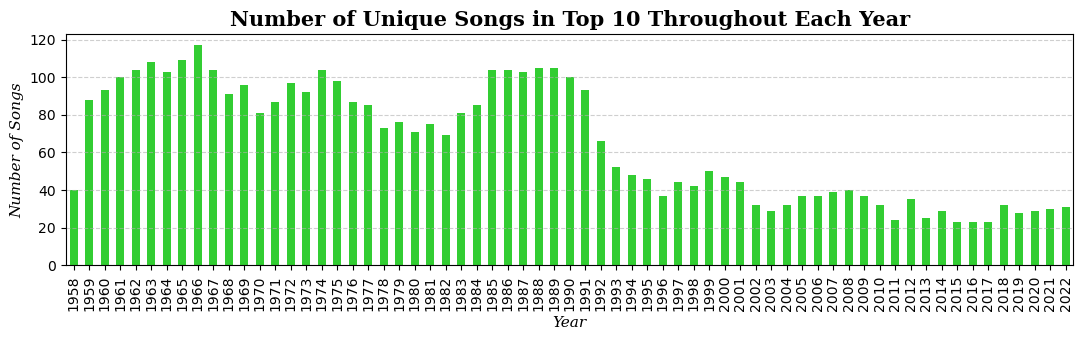

In [97]:
plt.figure(figsize=(13, 3))
songs_in_year = songs['year'].value_counts().sort_index()
songs_in_year.plot(kind='bar', color='limegreen')
plt.xlabel('Year', fontfamily='serif', fontstyle='italic', fontsize=11)
plt.ylabel('Number of Songs', fontfamily='serif', fontstyle='italic', fontsize=11)
plt.title('Number of Unique Songs in Top 10 Throughout Each Year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

It can clearly be seen that over time, the number of unique songs throughout a year's Top 10 have decreased. This likely means that songs spend a greater number of weeks on average in the Top 10 in later years, giving less songs a chance to enter the Top 10. We can verify this by finding the average number of weeks a song spends in the Top 10 each year, and comparing them.

In [98]:
# making the weeks_top_ten column type int64 to work with it easily
def make_a_number(cell):
    if "[" in cell:
        cell = cell[:cell.find("[")] + cell[cell.find("]")+1:]
    cell = cell.replace("''", "")
    cell = cell.replace("*", "")
    return int(cell)

songs['weeks_top_ten'] = songs['weeks_top_ten'].apply(make_a_number)

In [99]:
songs['weeks_top_ten'].dtype

dtype('int64')

Using the years and number of audio features given for each song, we can analyze how these audio features have changed in prevalence in popular culture over time. To do this, we can compare average values for each of the given audio features over the years.

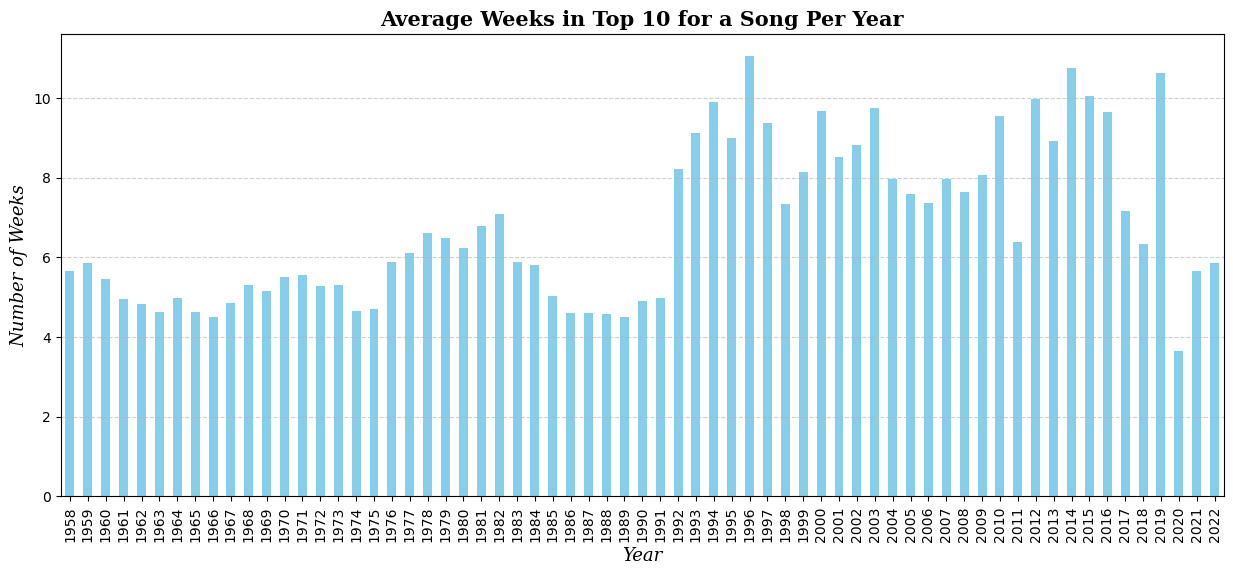

In [100]:
songs_grouped = songs.groupby(by='year').mean(numeric_only=True).drop(columns='peak').reset_index()
weeks = pd.Series(songs_grouped['weeks_top_ten'])
weeks.index = songs_grouped['year']
plt.figure(figsize=(15, 6))
weeks.plot(kind='bar', color='skyblue')
plt.xlabel('Year', fontfamily='serif', fontstyle='italic', fontsize=13)
plt.ylabel('Number of Weeks', fontfamily='serif', fontstyle='italic', fontsize=13)
plt.title('Average Weeks in Top 10 for a Song Per Year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

We can see that our predicted trend is generally true. As years have gone by, songs have on average spent a greater number of weeks in the top 10.

Let's also take a look at some rankings, starting with the artists most present in the Top 10 throughout history.

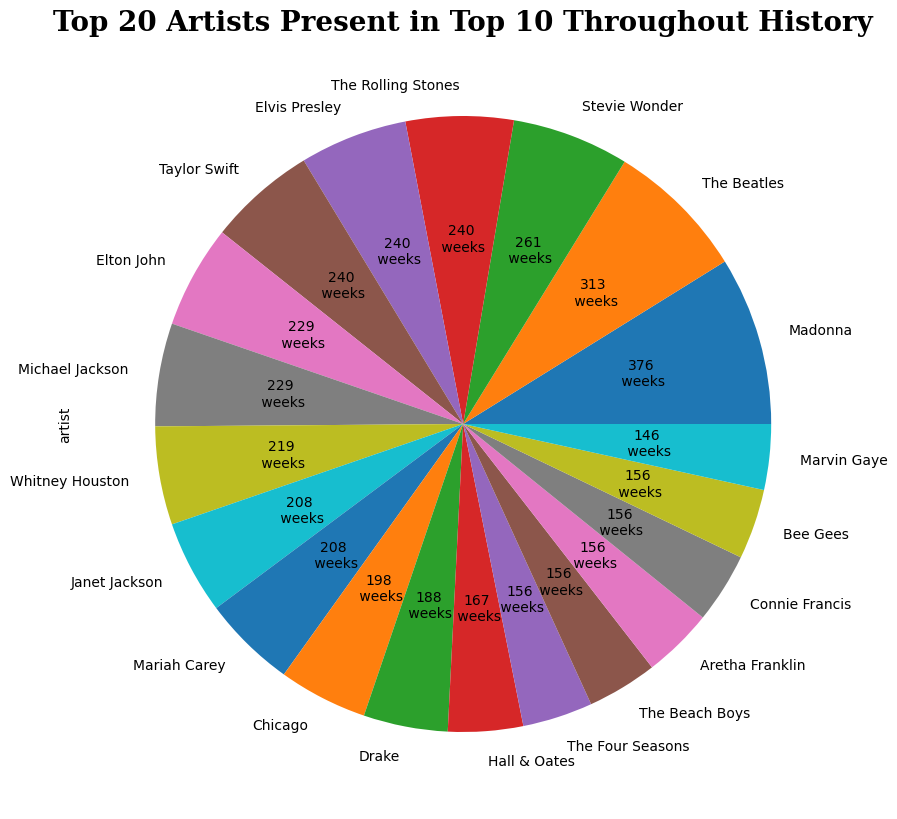

In [101]:
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"{absolute}\n weeks"

artists = songs['artist'].value_counts()
plt.figure(figsize=(10, 10))
artists[:20].plot(kind='pie', autopct=lambda pct: func(pct, artists))
plt.title('Top 20 Artists Present in Top 10 Throughout History', fontsize=20, fontfamily='serif', fontweight='bold')
plt.show()

We can see that Madonna is the artist with the most weeks spent in the Top 10 since 1958, with 376 weeks.

Let's also take a look at the songs with the most weeks spent in the top 10.

<Figure size 1300x300 with 0 Axes>

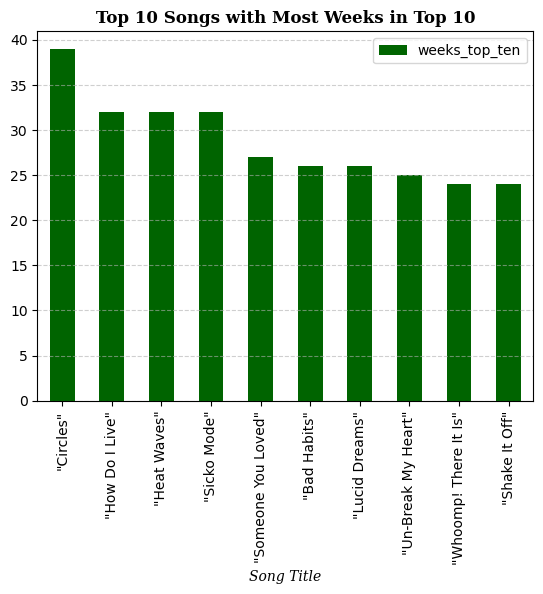

In [102]:
# some song titles in the dataset contained brackets with letters for characterization,
# use this function to get rid of those when showing the song titles in the bar chart
def rid_brackets(string):
    if "[" in string:
        string = string[:string.find('[')]
    return string
best_songs = songs.sort_values(by='weeks_top_ten', ascending=False)
best_songs = best_songs[['title', 'weeks_top_ten']]
best_songs['title'] = best_songs['title'].apply(rid_brackets)
best_songs = best_songs.set_index('title')[:10]

plt.figure(figsize=(13, 3))
best_songs.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Songs with Most Weeks in Top 10', fontfamily='serif', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('Song Title', fontfamily='serif', fontstyle='italic')
plt.show()

We can see that Circles by Post Malone is the song with the most weeks spent in the Top 10 from 1958 to 2022.

Let's move on to an analysis of the specific features of the songs in our dataset. We'll use the previously grouped songs_grouped dataframe to plot the change in average value for each feature over time.

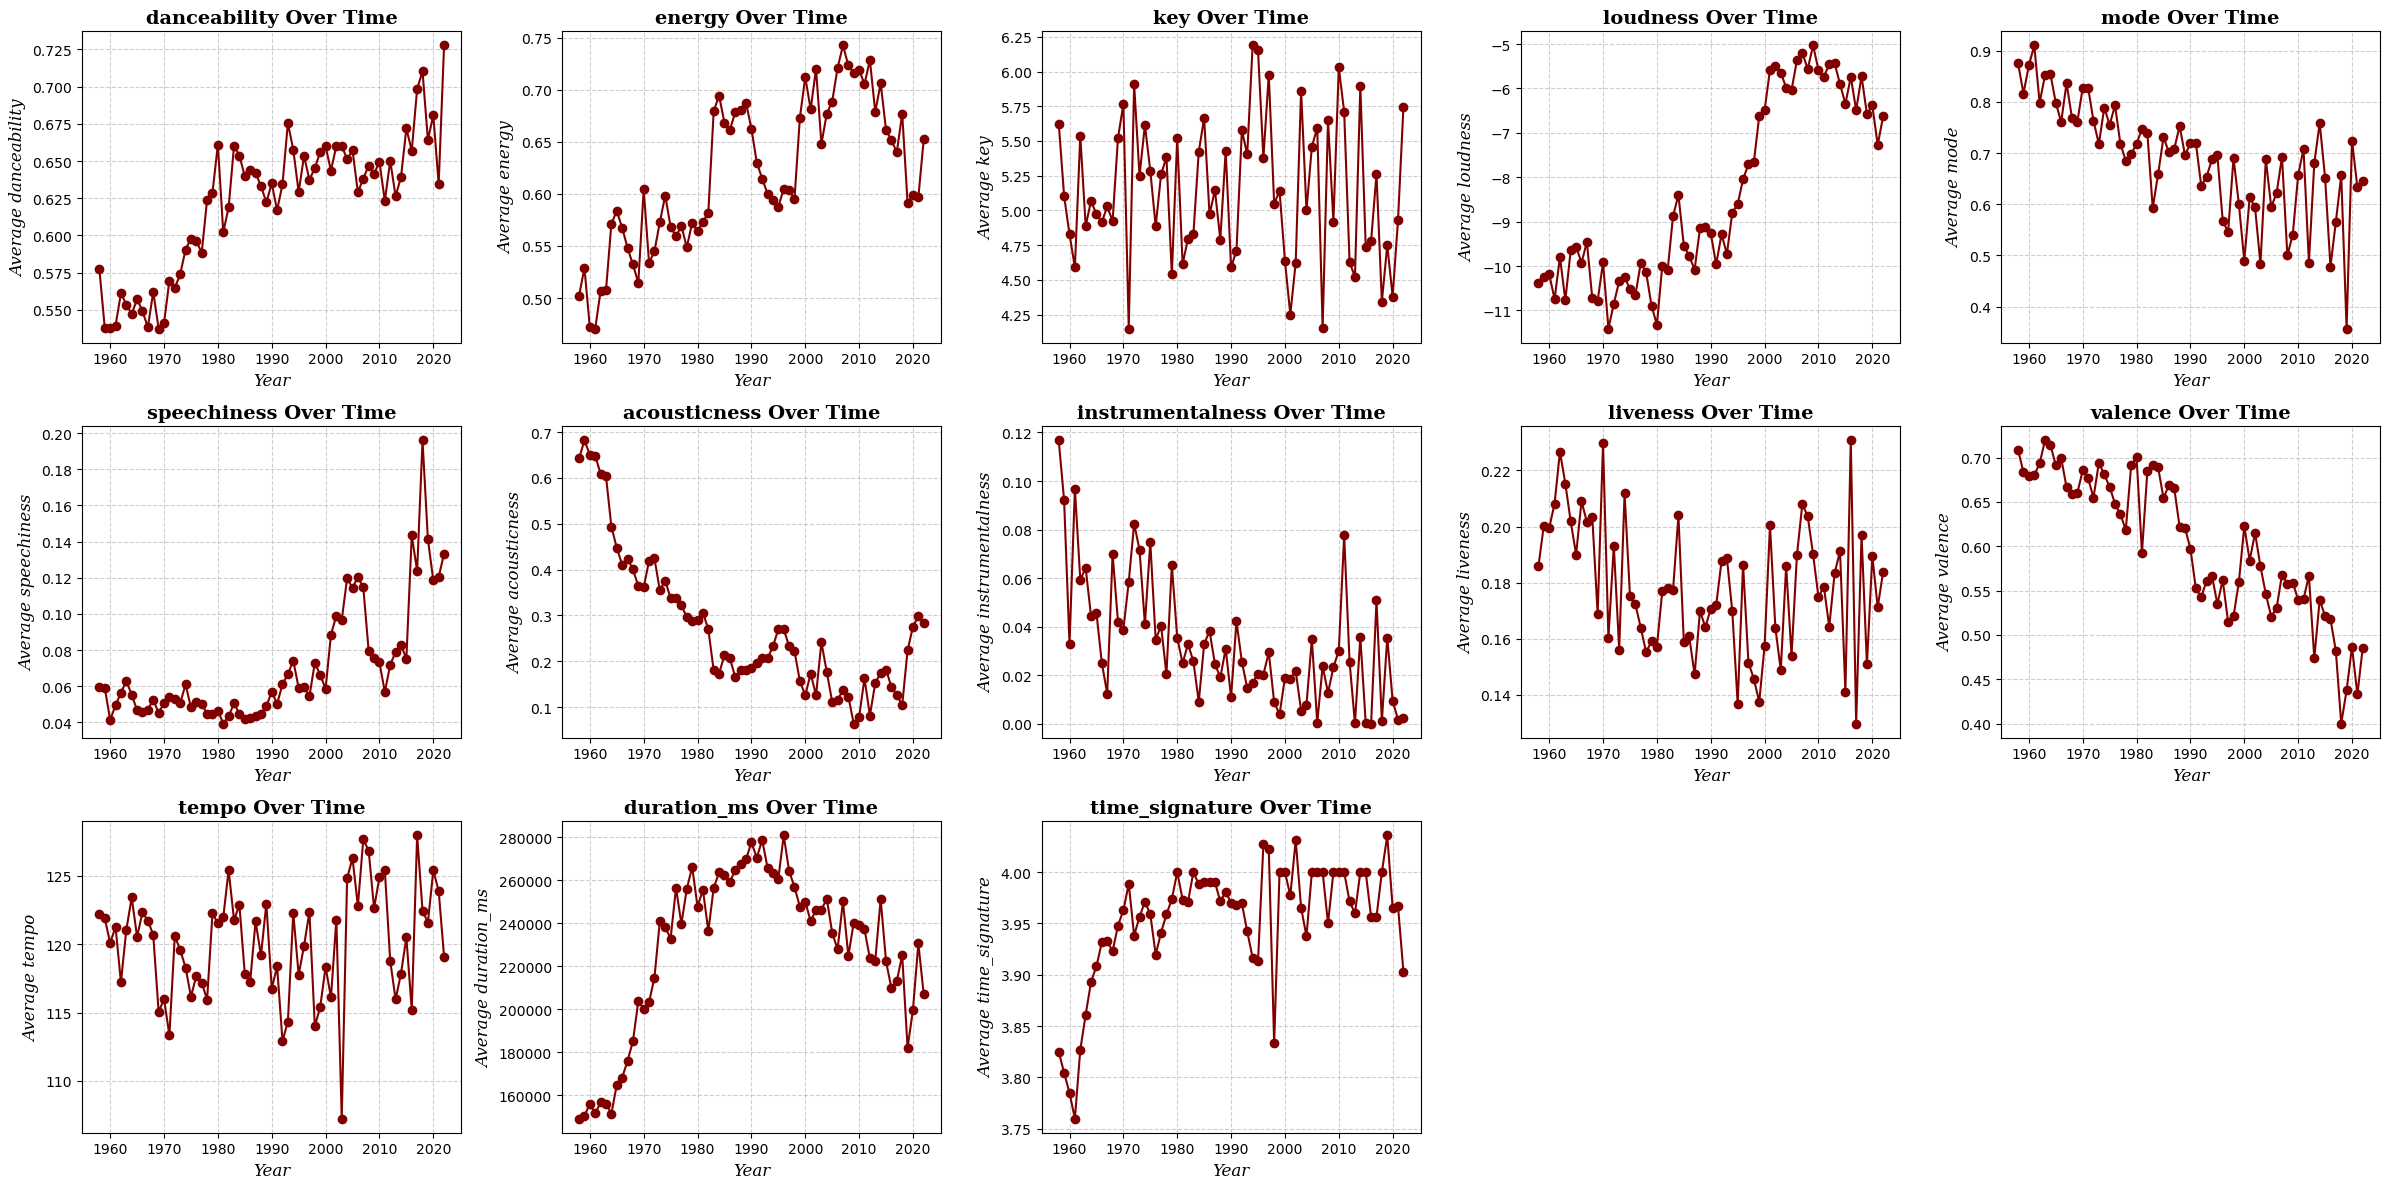

In [103]:
features_to_plot = songs_grouped.columns.values.tolist()
features_to_plot = features_to_plot[2:]

num_features = len(features_to_plot)
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8*num_rows, 12))
axes = axes.flatten()

for i, feat in enumerate(features_to_plot):
    ax = axes[i]
    ax.plot(songs_grouped['year'], songs_grouped[feat], marker='o', linestyle='-', color='maroon')
    ax.set_title(f"{feat} Over Time", fontfamily='serif', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontfamily='serif', fontsize=12, fontstyle='italic')
    ax.set_ylabel(f"Average {feat}", fontfamily='serif', fontsize=12, fontstyle='italic')
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Clearly there are some features that have significantly changed over time. Let's define some of those features before we look at them more closely:

`Danceability`: [0-1] Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

`Energy`: [0-1] Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

`Loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

`Mode`: The modality (major or minor) of a track, the type of scale from which its melodic content is derived.

`Speechiness`: [0-1] Detecs the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

`Acousticness`: [0-1] A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

`Instrumentalness`: [0-1] Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

`Valence`: [0-1] The musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


Let's first get a better look at some key features that have increased in average value over time.

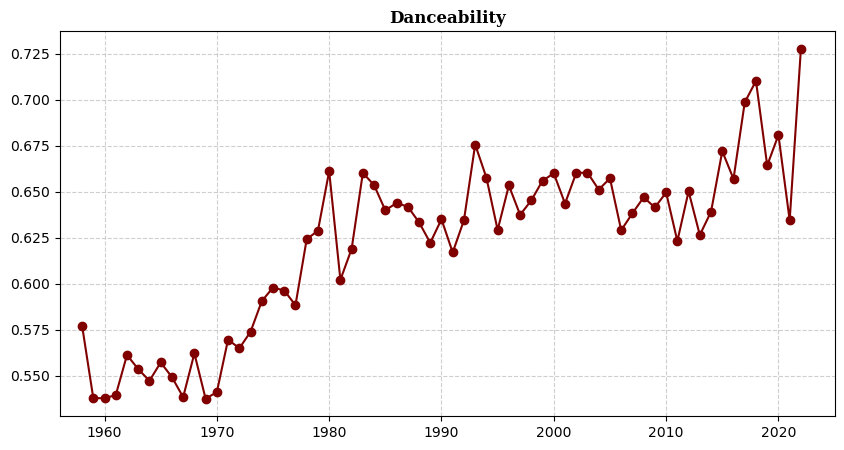

In [104]:
# DANCEABILITY
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['danceability'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Danceability', fontfamily='serif', fontweight='bold')
plt.show()

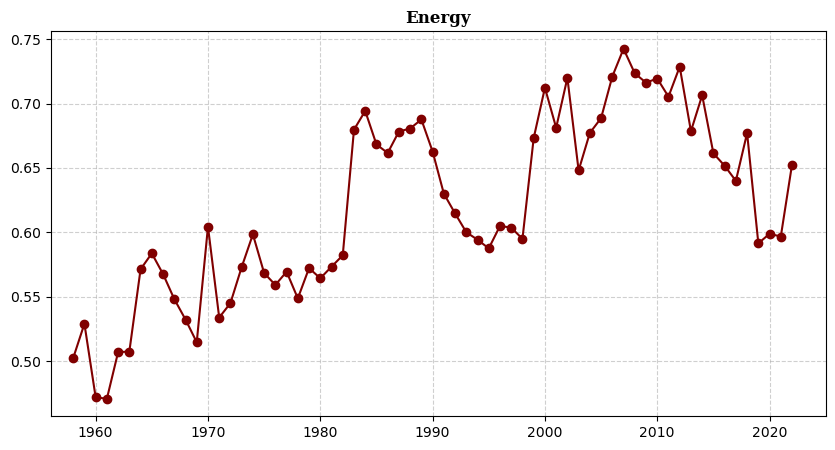

In [105]:
# ENERGY
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['energy'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Energy', fontfamily='serif', fontweight='bold')
plt.show()

While there seems to be clear peaks and valleys, `Energy` has generally increased over time.

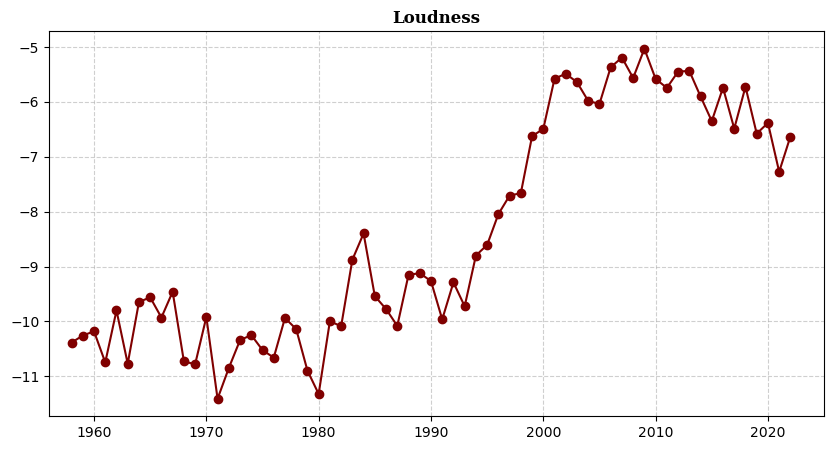

In [106]:
# LOUDNESS
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['loudness'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Loudness', fontfamily='serif', fontweight='bold')
plt.show()

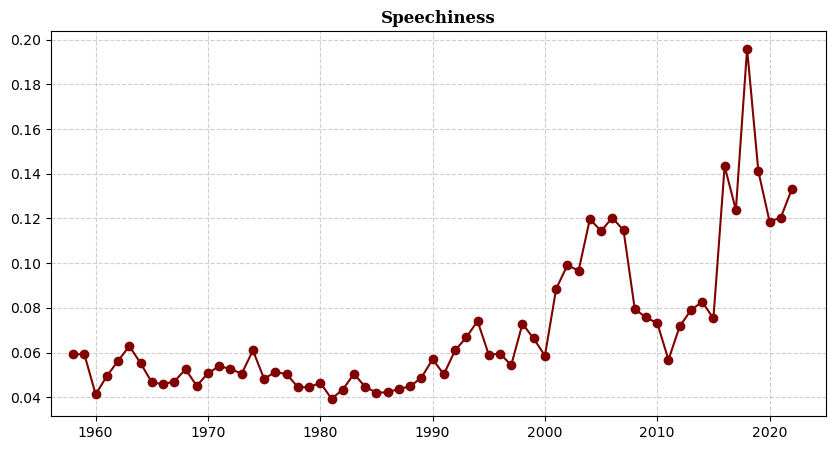

In [107]:
# SPEECHINESS
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['speechiness'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Speechiness', fontfamily='serif', fontweight='bold')
plt.show()

There has clearly been a drastic shift in the level of `Speechiness` present in the Top 10 songs of each year, just in the last 10 years or so. A likely reason for this is the increasing popularity of rap music (a genre with more speaking than singing) amongst the general public, and therefore its increasing presence on the charts.

Let's now get a better look at some features that have decreased in average value over time.

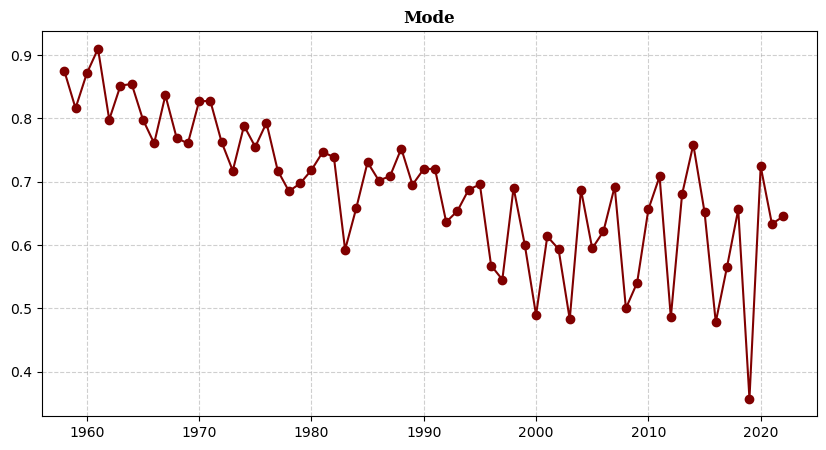

In [108]:
# MODE
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['mode'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Mode', fontfamily='serif', fontweight='bold')
plt.show()

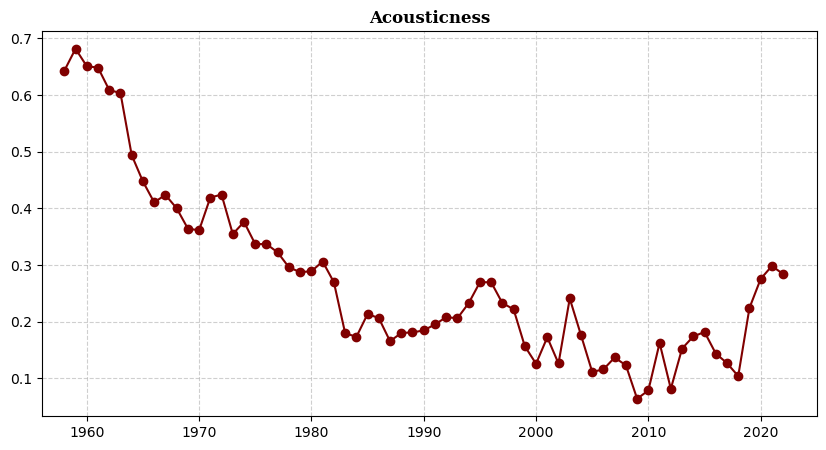

In [109]:
# ACOUSTICNESS
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['acousticness'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Acousticness', fontfamily='serif', fontweight='bold')
plt.show()

There's been a clear downward trend in `Acousticness` over time. Given that the music production process is constantly being innovated and producers are always finding new ways to create, it makes sense that acoustics are being emphasized less and less.

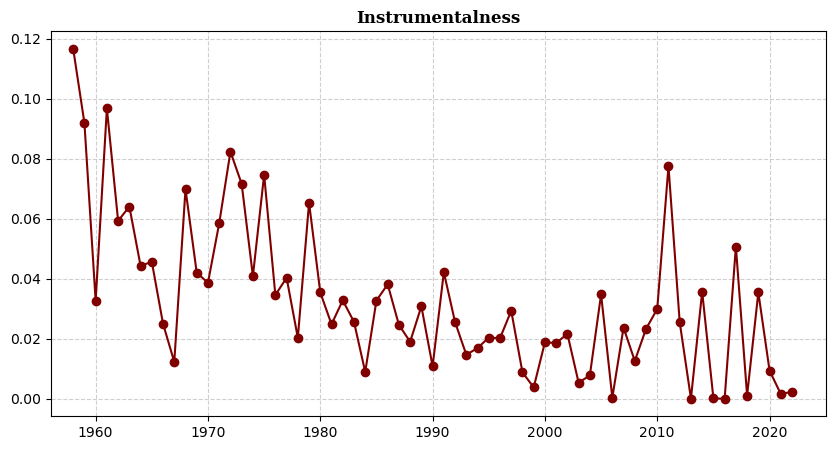

In [110]:
# INSTRUMENTALNESS
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['instrumentalness'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Instrumentalness', fontfamily='serif', fontweight='bold')
plt.show()

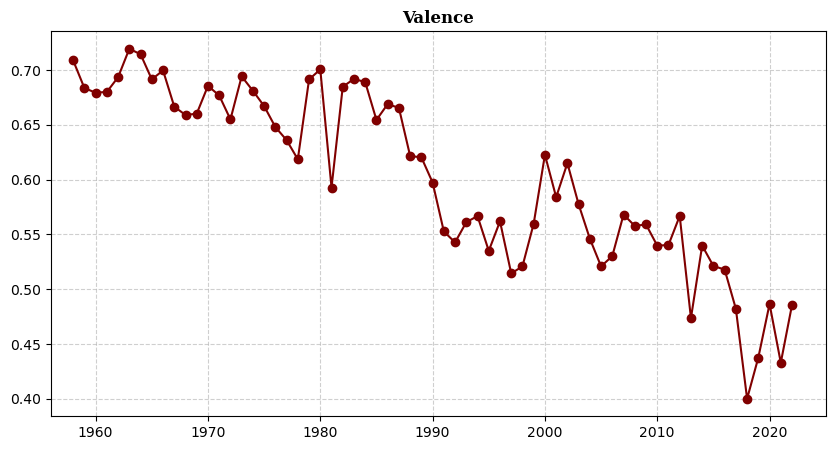

In [111]:
# VALENCE
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['valence'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Valence', fontfamily='serif', fontweight='bold')
plt.show()

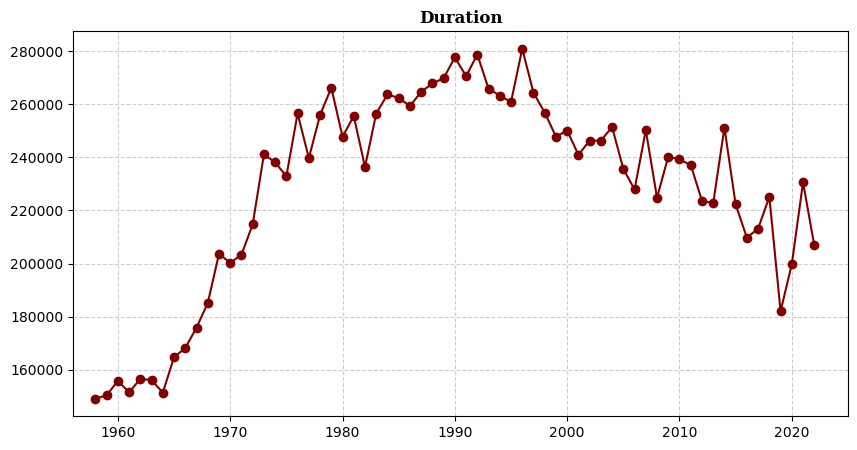

In [112]:
# DURATION
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['duration_ms'], marker='o', color='maroon')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Duration', fontfamily='serif', fontweight='bold')
plt.show()

Duration's trend is interesting in that it was on a continuous upward trajectory until its peak in the 1990s, and has since been decreasing. The growing presence of shorter songs on the charts has been a topic of conversation on the Internet in recent years as a result of TikTok. TikTok is a short-form content creation app, on which songs often go viral. These songs' virality is often greatly owed to its short length, as engagers of the app can quickly digest it and enjoy it. This has caused more and more artists to shorten song lengths in hopes to gain traction on TikTok. Due to this, we will likely see this downward trend in song length continue in the coming years.

We've now seen that some features have increased over time while others have decreased. While some can be clearly reasoned based on social changes and the like, other features may be correlated to one another. We can determine that by creating a correlation matrix for the features we've discussed.

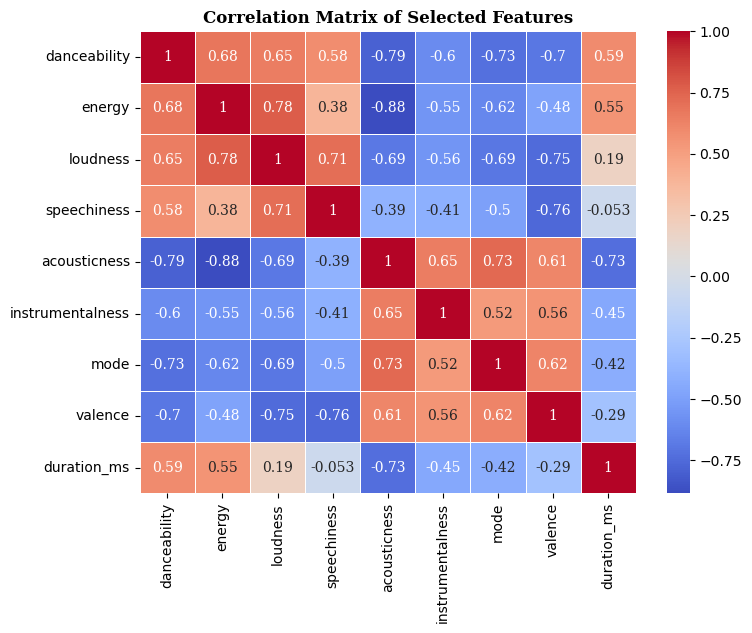

In [113]:
desired_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',\
                   'instrumentalness', 'mode', 'valence', 'duration_ms']

selected_features_df = songs_grouped[desired_features]
correlation_matrix = selected_features_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, \
            annot_kws={'fontproperties': {'family': 'serif'}})
plt.title("Correlation Matrix of Selected Features", fontfamily='serif', fontweight='bold')
plt.show()

From this correlation matrix, we can take note of a few things. `Acousticness` and `Energy` appear to be strongly negatively correlated, while `Loudness` and `Energy` appear to be strongly positively correlated. `Valence` is strongly negatively correlated with `Loudness` and `Speechiness`. `Danceability` and `Energy` appear to be strongly positively correlated, as well. Let's look at some of these features together to verify.

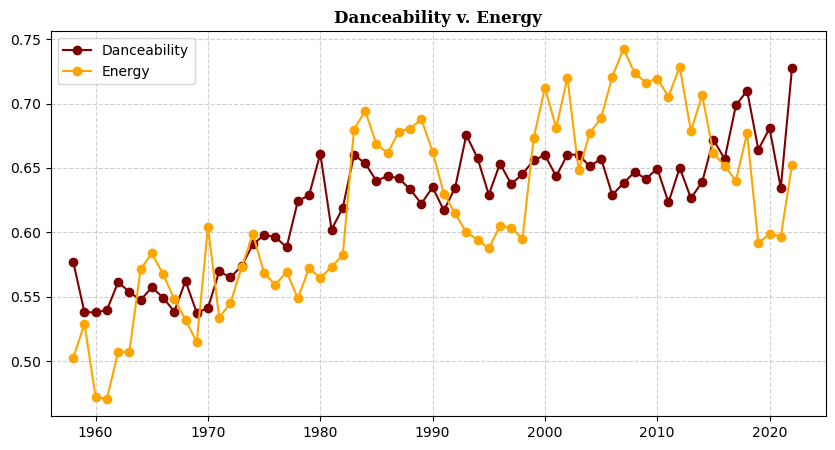

In [114]:
# DANCEABILITY V ENERGY
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['danceability'], marker='o', color='maroon', label='Danceability')
ax.plot(songs_grouped['year'], songs_grouped['energy'], marker='o', color='orange', label='Energy')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Danceability v. Energy', fontfamily='serif', fontweight='bold')
plt.legend()
plt.show()

`Danceability` and `Energy` indeed show a positive correlation. This makes sense, as songs with more energy would then logically be easier to dance to.

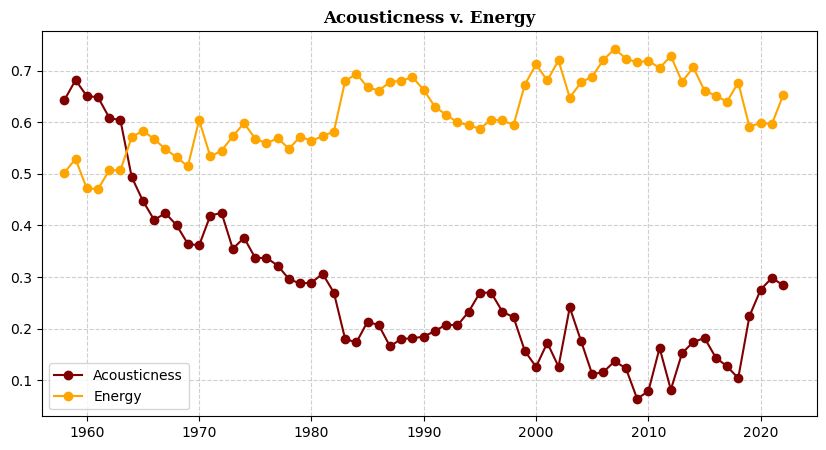

In [115]:
# ACOUSTICNESS V ENERGY
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['acousticness'], marker='o', color='maroon', label='Acousticness')
ax.plot(songs_grouped['year'], songs_grouped['energy'], marker='o', color='orange', label='Energy')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Acousticness v. Energy', fontfamily='serif', fontweight='bold')
plt.legend()
plt.show()

`Acousticness` and `Energy` indeed show a negative correlation. Acoustic songs tend to be more personal, laidback, and heartfelt, so the fact that they then have less energy makes sense.

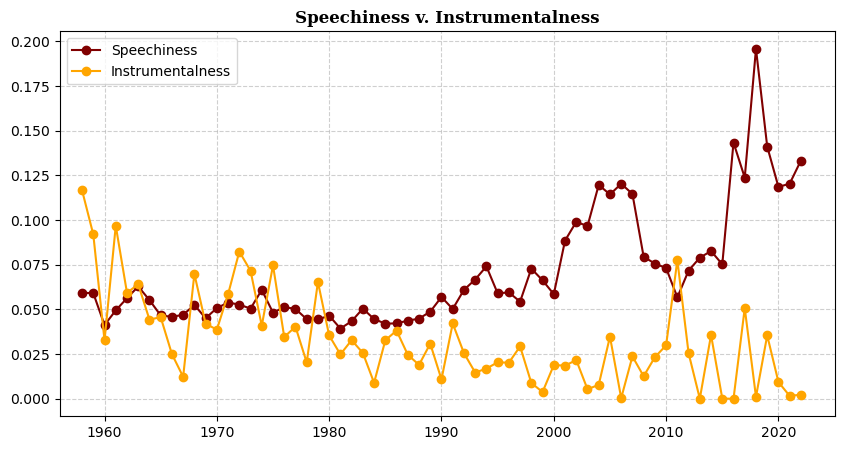

In [116]:
# SPEECHINESS V INSTRUMENTALNESS
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(songs_grouped['year'], songs_grouped['speechiness'], marker='o', color='maroon', label='Speechiness')
ax.plot(songs_grouped['year'], songs_grouped['instrumentalness'], marker='o', color='orange', label='Instrumentalness')
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(1956, 2025)
ax.set_title('Speechiness v. Instrumentalness', fontfamily='serif', fontweight='bold')
plt.legend()
plt.show()

While the negative correlation between `Speechiness` and `Instrumentalness` wasn't quite as strong, it is still noticeable and makes sense. If a song is speechier, the creators of the song likely intended for the listeners to give more attention to the lyrics, and therefore put less focus on the instrumentation of that song.